In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
from pickle import dump, load

In [14]:
images_folder = '../images'

X = []
y = []

for subdir, files in os.walk(images_folder):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png')):
            img_path = os.path.join(subdir, file)
            label = os.path.basename(subdir)
            
            image = Image.open(img_path).convert('L')
            image = image.resize((48, 48))
            X.append(np.array(image).flatten())
            y.append(label)
            
# with open("knn_standardscaler_gridsearch_xy_dump.pkl", "wb") as f:
#     dump((X,y), f, protocol=5)
            

In [ ]:
with open("svc_standardscaler_gridsearch_xy_dump.pkl", "rb") as f:
    X,y = load(f)

In [15]:
# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [16]:
# Normalize image data
X = X / 255.0  # Normalize pixel values to [0, 1]

In [17]:
# Encode labels as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [18]:
pca = PCA(n_components=100)  # Reduce to 100 components
X_reduced = pca.fit_transform(X)

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

In [20]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
# Grid Search
param_grid = {
    'n_neighbors': [1, 3, 5, 7],  
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']  
}

best_combination = 0
best_accuracy = 0

all_combinations = list(ParameterGrid(param_grid))

for combination in all_combinations:
    print(combination)
    knn_model =  KNeighborsClassifier(**combination)
    knn_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_combination = combination

    
# Print the best combination
print("\nBest Combination:", best_combination)
print(f"Best Accuracy: {best_accuracy:.2f}")
print("\nTotal combinations:", len(all_combinations))

knn_model = KNeighborsClassifier(**best_combination)
knn_model.fit(X_train, y_train)

with open("knn_model_standardscaler_grisearch_pca_dump.pkl", "wb") as f:
    dump(knn_model, f, protocol=5)
    
print("Best model saved successfully!")

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [22]:
# Make Prediciton
best_knn = knn_model.best_estimator_
best_knn
y_pred = best_knn.predict(X_test)
y_pred

array([4, 3, 3, ..., 4, 5, 2])

In [23]:
# # Evaluate the model
# print("Classification Report:")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
Accuracy: 0.8781609195402299
              precision    recall  f1-score   support

       angry       0.88      0.86      0.87      1963
     disgust       0.86      0.94      0.89       217
        fear       0.87      0.87      0.87      2064
       happy       0.92      0.87      0.90      3590
     neutral       0.81      0.89      0.85      2504
         sad       0.87      0.87      0.87      2417
    surprise       0.90      0.92      0.91      1600

    accuracy                           0.88     14355
   macro avg       0.88      0.89      0.88     14355
weighted avg       0.88      0.88      0.88     14355

Accuracy: 0.88


IndexError: index 15522 is out of bounds for axis 0 with size 14355

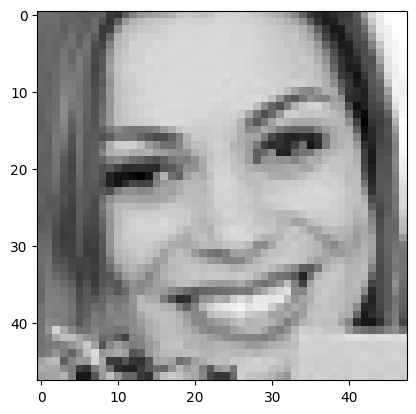

In [24]:
# Use the original dataset for visualization
for i in range(5):
    idx = np.random.randint(0, len(X))
    image = X[idx].reshape(48, 48)  # Original data
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
    plt.show()
